In [1]:
import pyca
import numpy as np

In [2]:
ca = pyca.rule (2, [[-1],[0],[1]], 110)
ca

Cellular Automaton (stateset = 2, neighborhood = [[-1]
 [ 0]
 [ 1]], rule = 110, dtype = <class 'numpy.uint8'>)

In [3]:
ca.de_Bruijn

[matrix([[1, 0, 0, 0],
         [0, 0, 0, 0],
         [1, 0, 0, 0],
         [0, 0, 0, 1]], dtype=uint64),
 matrix([[0, 1, 0, 0],
         [0, 0, 1, 1],
         [0, 1, 0, 0],
         [0, 0, 1, 0]], dtype=uint64)]

In [4]:
ether = pyca.lattice(ca, [0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1])

In [5]:
for i in range(14):
    print(i, ether)
    ether.next()
print(ether)

0 b'00010011011111'
1 b'00110111110001'
2 b'01111100010011'
3 b'11000100110111'
4 b'01001101111100'
5 b'11011111000100'
6 b'11110001001101'
7 b'00010011011111'
8 b'00110111110001'
9 b'01111100010011'
10 b'11000100110111'
11 b'01001101111100'
12 b'11011111000100'
13 b'11110001001101'
b'00010011011111'


In [6]:
Df = ether.preimage_vector_array_forward()
Db = ether.preimage_vector_array_backward()
D  = ether.preimage_vector_array()
Dw = ether.weight_vector_array()
#Df, Db, D

In [7]:
Mf = ether.preimage_matrix_array_forward()
Mb = ether.preimage_matrix_array_backward()
M  = ether.preimage_matrix_array()
#Mw = ether.weight_matrix_array()
#Mb

In [8]:
ep = ether.previous()
ep

array([[1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1],
       [1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1]], dtype=uint8)

In [9]:
for C in ep:
    C = pyca.lattice(ca, C)
    C.next()
    print(C)

b'00010011011111'
b'00010011011111'


In [10]:
for C in ep:
    C = pyca.lattice(ca, C)
    c1 = C.previous()
    print(c1)

[[1 1 0 1 1 1 1 1 0 0 0 1 0 0]
 [0 1 0 1 1 1 1 1 0 0 0 1 1 1]]
[[1 1 0 1 1 1 1 1 0 1 1 1 0 0]]


In [11]:
eo = pyca.lattice(ca, [0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1], boundary='open')
eo

b'00010011011111'

In [12]:
ep = eo.previous()
ep

array([[1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1],
       [1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0],
       [1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0],
       [1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1],
       [1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0],
       [1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1],
       [1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1]], dtype=uint8)

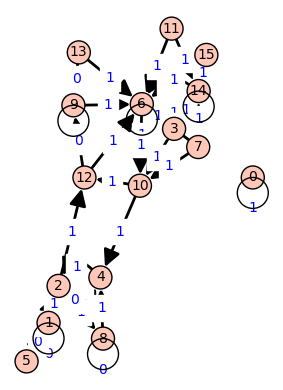

In [13]:
g = ca.construct_subset_graph()
g.plot(edge_labels=True)

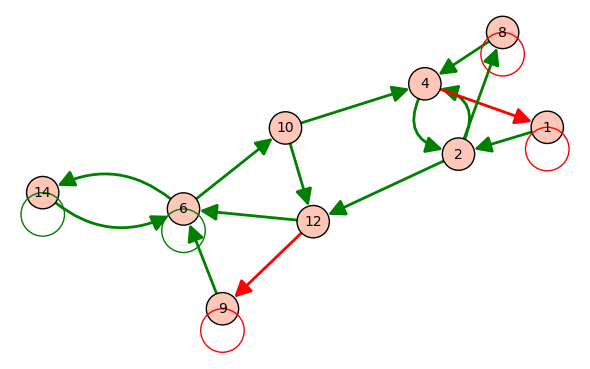

In [14]:
g1 = g.copy()
g1.delete_vertices(g.sources())
g1.delete_vertex(0)
g1.plot(color_by_label={0: 'red', 1: 'green'})

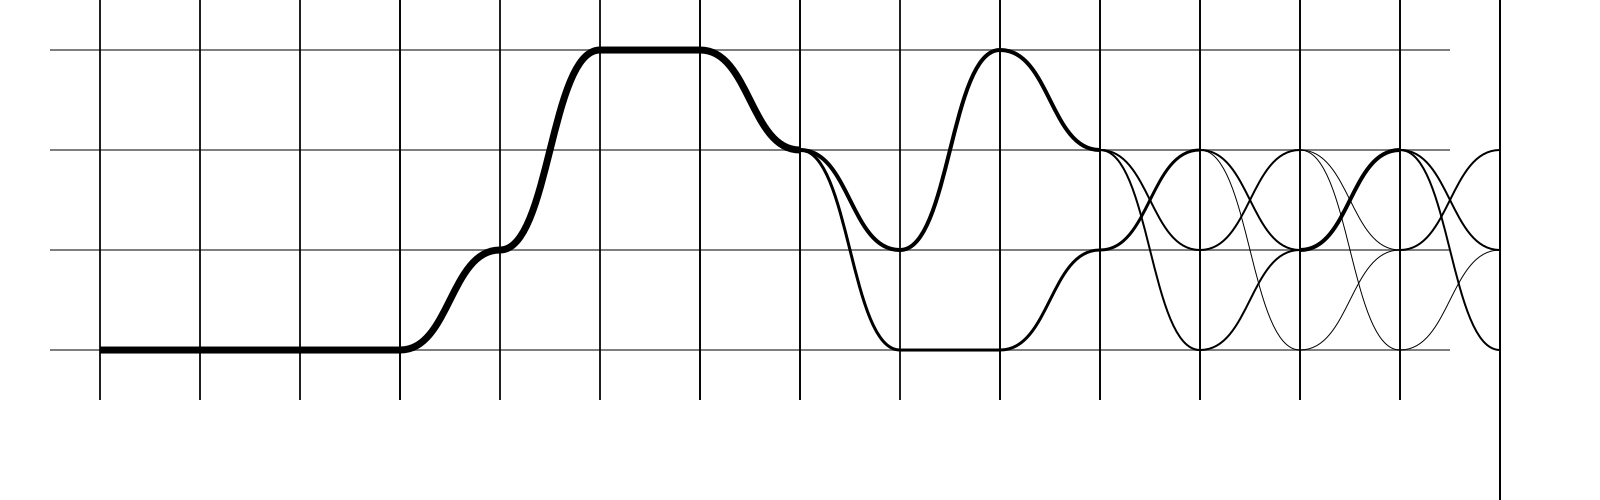

In [15]:
from IPython.display import SVG

svg = ether.preimage_vector_graph()
SVG(svg)